# Carnot heat engine cycle

Figure 11.6 from Chapter 11 of *Stellar Structure & Evolution*, Pinsonneault & Ryden, Cambridge University Press.

Pressure-Volume diagram for a Carnot heat engine with $T_c = 0.8 T_h$ and $\gamma = 5/3$.

In [5]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [6]:
plotFile = 'Fig11_6.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Models

Compute the P and V for a Carnot engine with 
 * $\gamma=5/3$
 * $T_{cold}$=0.8$T_{hot}$
 * $P_a$=1.0 and $V_a$=1.0
 * $V_b$=1.5

Four stages of the cycle:
 * Isothermal Expansion 
 * Adiabatic Expansion 
 * Isothermal Compression
 * Adiabatic Compression
 
Also draw lines of constant $T_c$ and $T_h$ in the P-V plane.

In [7]:
gamma = 5.0/3.0
Tcold = 0.80
Va = 1.0
Pa = 1.0
Vb = 1.5
nv = 101

# Isothermal Expansion

Vie = np.linspace(Va,Vb,nv)
Pie = Pa*(Va/Vie)

# Adiabatic Expansion

Pb = Pie[-1]
ex = 1.0/(gamma-1.0)
Vc = Vb/(Tcold**ex)
Vae = np.linspace(Vb,Vc,nv)
Pae = Pb*(Vb/Vae)**gamma

# Isothermal Compression

Pc = Pae[-1]
Vd = Va/(Tcold**ex)
Vic = np.linspace(Vc,Vd,nv)
Pic = Pc*(Vc/Vic)

# Adiabatic Compression

Pd = Pic[-1]
Vac = np.linspace(Vd,Va,nv)
Pac = Pd*(Vd/Vac)**gamma

# Line of constant T_c and T_h in the P-V plane

Vmin = 0.2
Vmax = 4.2
Vthc = np.linspace(Vmin,Vmax,nv)
Phot = 1.0/Vthc
Pcold = Tcold/Vthc

# Plotting limits

minV = 0.8
maxV = 2.3
minP = 0.2
maxP = 1.2

## Figure 11.6

Carnot engine cycle, start with the basic plot then add details and labels.

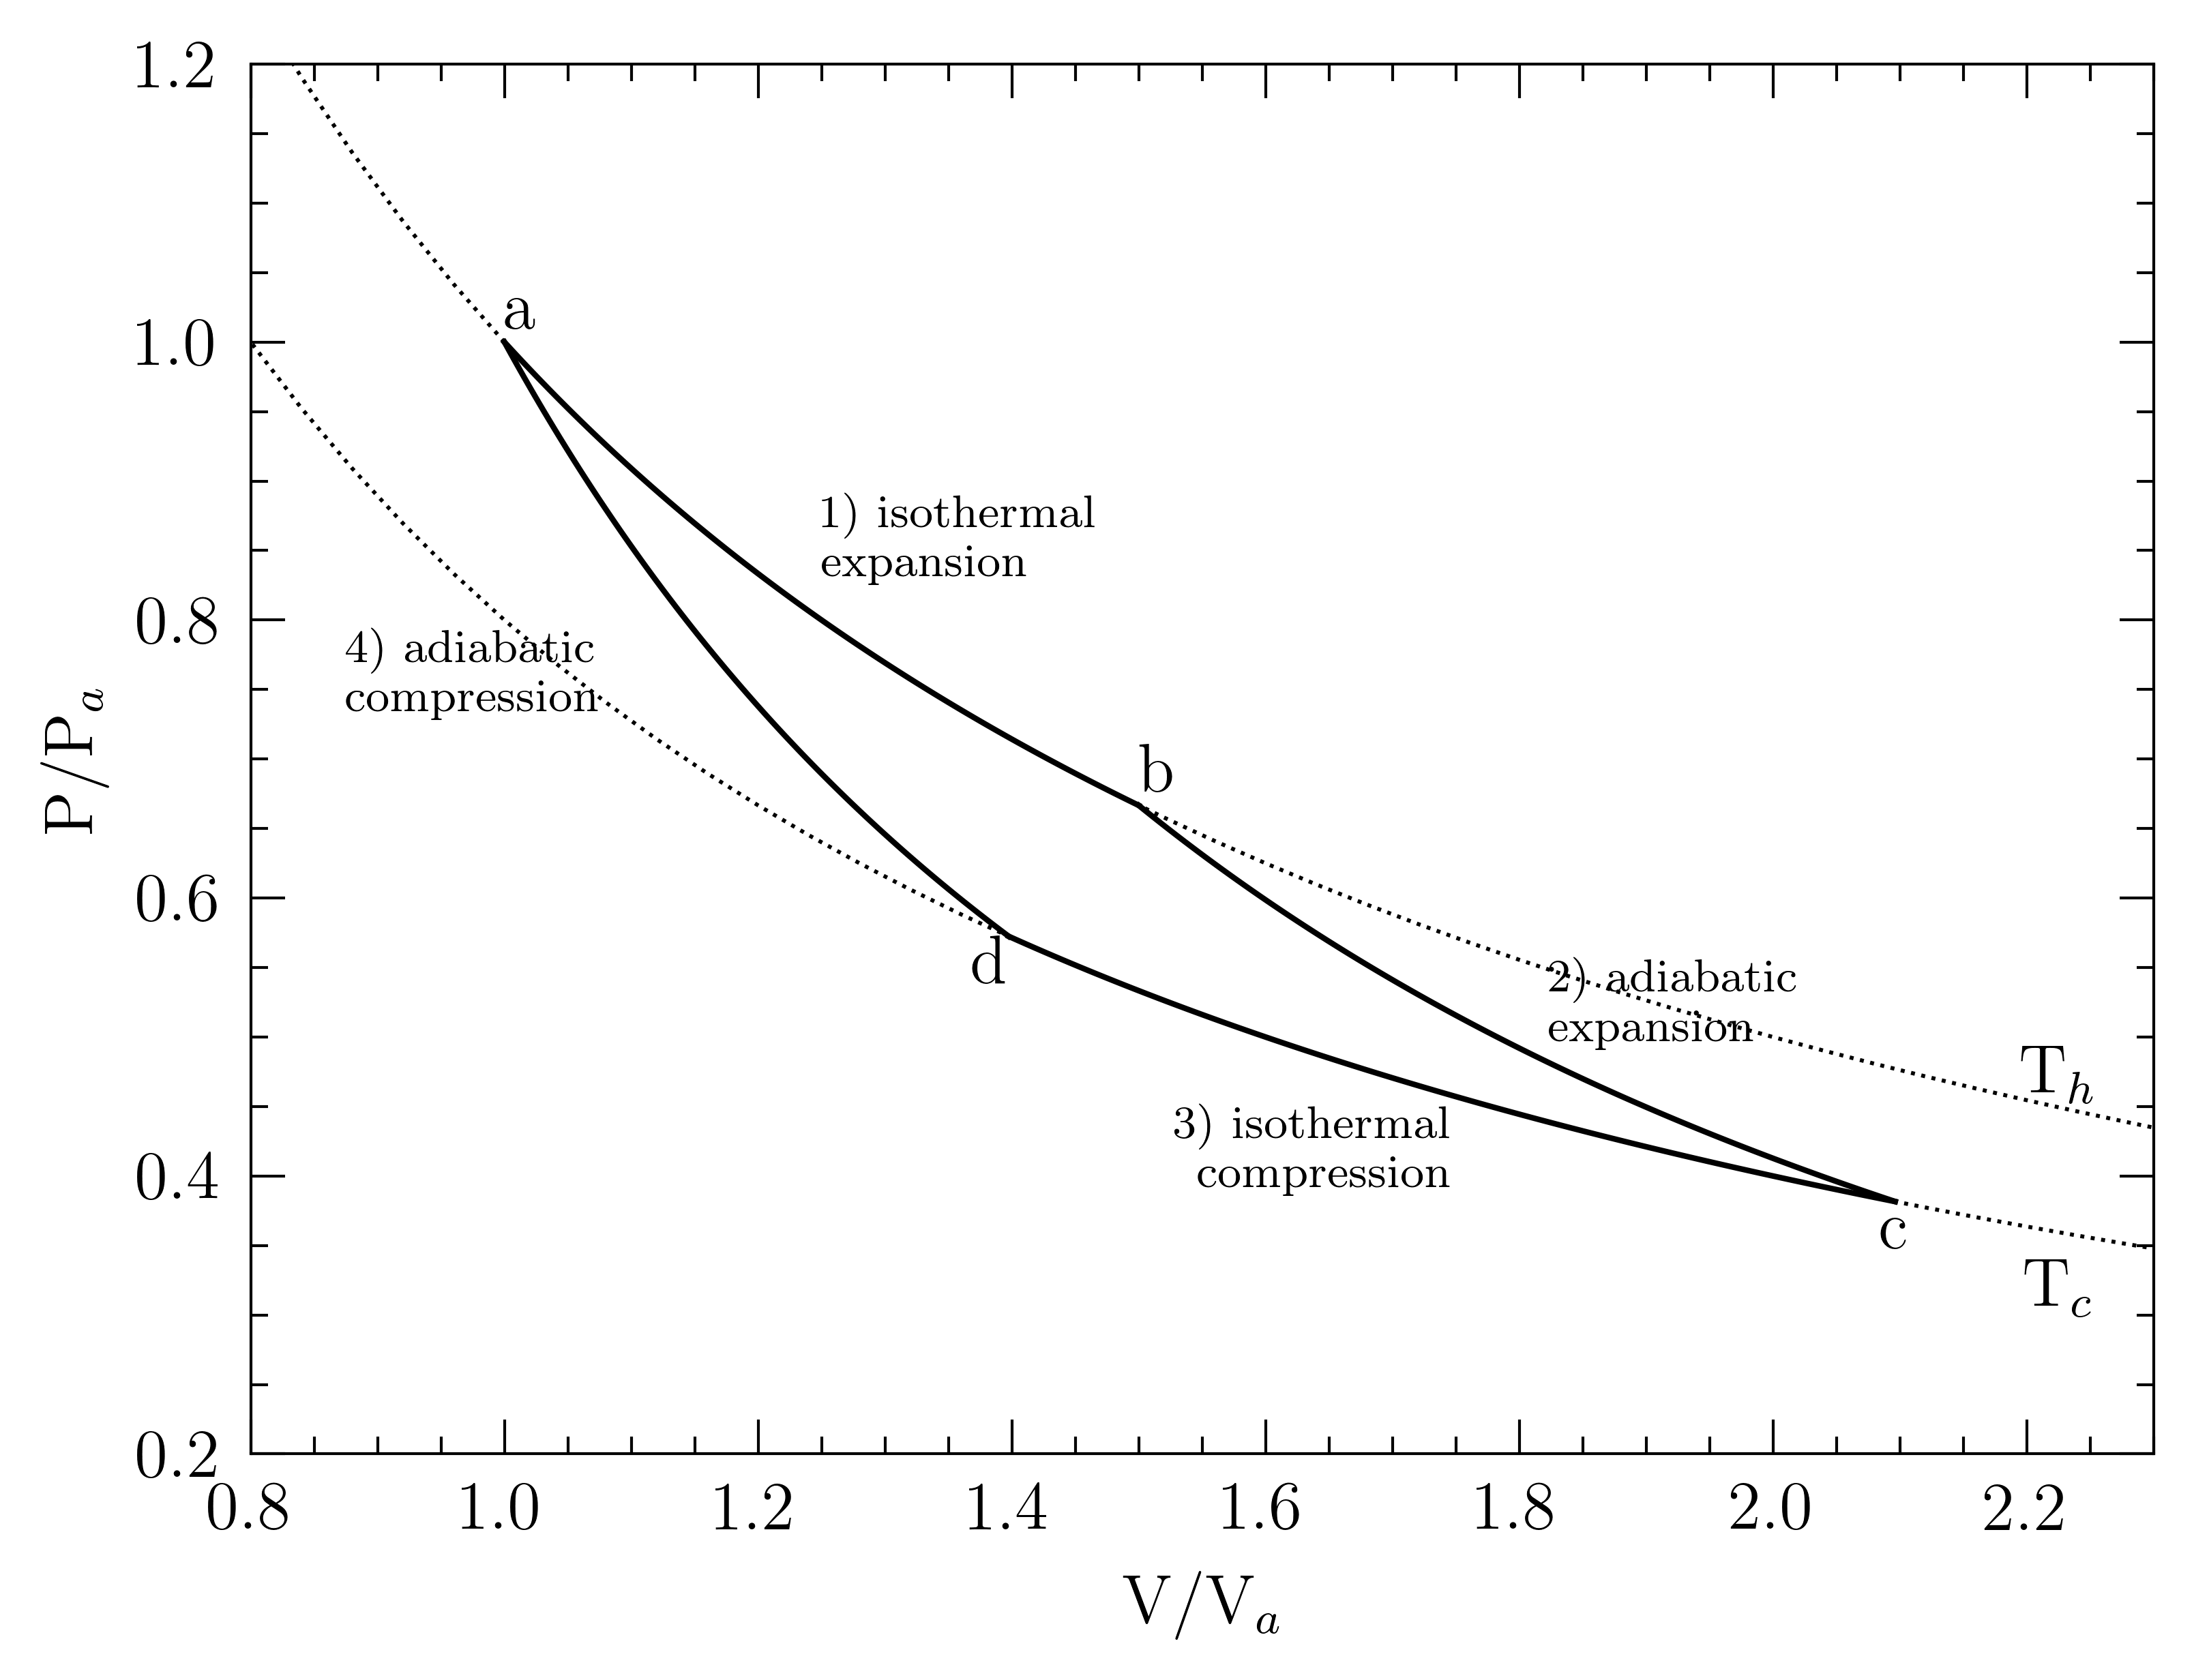

In [8]:
# Setup the Plot (our standard size etc.)

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(minV,maxV)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_xlabel(r'V/V$_a$',fontsize=axisFontSize)

ax.set_ylim(minP,maxP)
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_ylabel(r'P/P$_a$',fontsize=axisFontSize)

# 4 strokes of the cycle

ax.plot(Vie,Pie,'-',color='black',lw=1,zorder=10)
ax.text(Vie[0],Pie[0],'a',color='black',va='bottom',ha='left',fontsize=axisFontSize)
ax.text(0.5*(Vie[0]+Vie[-1]),0.5*(Pie[0]+Pie[-1])+0.025,'1) isothermal\nexpansion',
         ha='left',va='center',fontsize=labelFontSize)

ax.plot(Vae,Pae,'-',color='black',lw=1,zorder=10)
ax.text(Vae[0],Pae[0],'b',color='black',va='bottom',ha='left',fontsize=axisFontSize)
ax.text(0.5*(Vae[0]+Vae[-1])+0.025,0.5*(Pae[0]+Pae[-1]),'2) adiabatic\nexpansion',
         ha='left',va='center',fontsize=labelFontSize)

ax.plot(Vic,Pic,'-',color='black',lw=1,zorder=10)
ax.text(Vic[0],Pic[0],'c',color='black',va='top',ha='center',fontsize=axisFontSize)
ax.text(0.5*(Vic[0]+Vic[-1]),0.5*(Pic[0]+Pic[-1])-0.025,'3) isothermal\ncompression',
         ha='right',va='top',fontsize=labelFontSize)

ax.plot(Vac,Pac,'-',color='black',lw=1,zorder=10)
ax.text(Vac[0],Pac[0],'d',color='black',va='top',ha='right',fontsize=axisFontSize)
ax.text(0.875,0.5*(Pac[0]+Pac[-1])-0.025,'4) adiabatic\ncompression',
         ha='left',va='center',fontsize=labelFontSize)

# Dashed lines of constant Tcold and Thot

ax.plot(Vthc,Phot,':',color='black',lw=0.7,zorder=8)
ax.text(2.225,0.45,r'T$_h$',color='black',va='bottom',ha='center',fontsize=axisFontSize)

ax.plot(Vthc,Pcold,':',color='black',lw=0.7,zorder=8)
ax.text(2.225,0.34,r'T$_c$',color='black',va='top',ha='center',fontsize=axisFontSize)

# make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')